# Model Building

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

## Importing the dataset

In [2]:
poll_df = pd.read_csv('air_pollution_gauss_cleaned.csv') # Loading normally or gaussian distributed data
poll_df.head()

,Date,State Name,New Covid Cases,Population Staying at Home,Population Not Staying at Home,Number of Trips,pm10_mean,pm25_mean,co_mean,no2_mean,o3_mean,so2_mean,press_mean,rh_mean,temp_mean,wind_mean,AQI,Category
0,2020-01-01,Alabama,0.0,859.830216,1710.371305,3245.716331,3.535534,2.868094,0.543782,4.046470,0.033676,0.951766,3.799426e+36,223.283219,48.435555,92.363889,6.055301,Good
1,2020-01-01,California,0.0,1161.114551,2234.236335,4629.817437,4.197069,3.454464,0.639386,3.185928,0.022262,0.755213,2.689899e+36,318.449161,49.710225,93.809963,7.440329,Moderate
2,2020-01-01,Colorado,0.0,766.009791,1408.948899,2977.793038,3.201562,2.187598,0.570414,3.518695,0.038290,1.050116,5.285798e+35,327.386469,31.375000,113.998580,5.524357,Good
3,2020-01-01,Connecticut,0.0,499.490741,975.321998,1965.252528,2.280351,1.762456,0.439804,2.559934,0.024059,0.325265,3.405333e+36,195.157135,37.482143,135.210606,4.708149,Good
4,2020-01-01,Florida,0.0,1160.936691,2275.216913,4589.595448,4.427189,3.655956,0.556034,3.329852,0.030658,1.010231,4.687015e+36,343.042315,61.408333,102.174306,6.786109,Good


## Normalization and Scaling of Data

In [3]:
poll_df.columns

Index(['Date', 'State Name', 'New Covid Cases', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips', 'pm10_mean',
       'pm25_mean', 'co_mean', 'no2_mean', 'o3_mean', 'so2_mean', 'press_mean',
       'rh_mean', 'temp_mean', 'wind_mean', 'AQI', 'Category'],
      dtype='object')

In [ ]:
# from sklearn.preprocessing import StandardScaler
# continous_features = ['New Covid Cases', 'Population Staying at Home',
#        'Population Not Staying at Home', 'Number of Trips', 'pm10_mean',
#        'pm25_mean', 'co_mean', 'no2_mean', 'o3_mean', 'so2_mean', 'press_mean',
#        'rh_mean', 'temp_mean', 'wind_mean', 'AQI']

# stdScale = StandardScaler()
# for col_name in continous_features:
#     poll_df[col_name] = stdScale.fit_transform(poll_df[[col_name]])

In [4]:
poll_df.head()

,Date,State Name,New Covid Cases,Population Staying at Home,Population Not Staying at Home,Number of Trips,pm10_mean,pm25_mean,co_mean,no2_mean,o3_mean,so2_mean,press_mean,rh_mean,temp_mean,wind_mean,AQI,Category
0,2020-01-01,Alabama,0.0,859.830216,1710.371305,3245.716331,3.535534,2.868094,0.543782,4.046470,0.033676,0.951766,3.799426e+36,223.283219,48.435555,92.363889,6.055301,Good
1,2020-01-01,California,0.0,1161.114551,2234.236335,4629.817437,4.197069,3.454464,0.639386,3.185928,0.022262,0.755213,2.689899e+36,318.449161,49.710225,93.809963,7.440329,Moderate
2,2020-01-01,Colorado,0.0,766.009791,1408.948899,2977.793038,3.201562,2.187598,0.570414,3.518695,0.038290,1.050116,5.285798e+35,327.386469,31.375000,113.998580,5.524357,Good
3,2020-01-01,Connecticut,0.0,499.490741,975.321998,1965.252528,2.280351,1.762456,0.439804,2.559934,0.024059,0.325265,3.405333e+36,195.157135,37.482143,135.210606,4.708149,Good
4,2020-01-01,Florida,0.0,1160.936691,2275.216913,4589.595448,4.427189,3.655956,0.556034,3.329852,0.030658,1.010231,4.687015e+36,343.042315,61.408333,102.174306,6.786109,Good


## Splitting into Dependent and Independent Features

In [5]:
X = poll_df[['New Covid Cases', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips', 'pm10_mean',
       'pm25_mean', 'co_mean', 'no2_mean', 'o3_mean', 'so2_mean', 'press_mean',
       'rh_mean', 'temp_mean', 'wind_mean']].values
y = poll_df['AQI'].values

## Regression Model Building Unbalanced Data or Original Data

### Normalization and Scaling of Data

In [6]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [8]:
X = sc_X.fit_transform(X)

### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Decision Tree Regression model

#### Training

In [10]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

#### Predicting the Results

In [11]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[8.01 8.01]
 [5.64 5.56]
 [5.51 5.55]
 ...
 [7.72 6.97]
 [4.58 4.09]
 [4.87 4.98]]


#### Model Evaluation

In [12]:
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R squared value: ",r2_score(y_test, y_pred))

MAE: 0.31777281999278084
MSE: 0.18890280598768902
RMSE: 0.43462950427656083
R squared value:  0.7464381917568774


### Decision Tree regression with K Fold Cross Validation and Grid Search

#### Training

In [13]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [14]:
# calculating different regression metrics
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(regressor,param_grid=parameters,cv=3,verbose=3)
grid.fit(X,y)

Streaming output truncated to the last 5000 lines.
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.272 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=0.280 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=0.195 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.007 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-0.015 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitt

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
67200 fits failed out of a total of 151200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must 

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             verbose=3)

In [15]:
# best hyperparameters 
grid.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [16]:
# best model score
grid.best_score_

0.6021893551621467

#### Training Decision Tree With Best Hyperparameters

In [17]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=10,min_samples_leaf=1,
                                         min_weight_fraction_leaf=0.1,splitter='best')

In [18]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=10,
                      min_weight_fraction_leaf=0.1)

#### Predicting the Results

In [22]:
tuned_pred=tuned_hyper_model.predict(X_test)

#### Model Evaluation

In [23]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))
print("R squared value: ",r2_score(y_test, tuned_pred))

MAE: 0.40557415063653923
MSE: 0.2779677544731641
RMSE: 0.5272264736080351
R squared value:  0.6268874562822047


#### Plotting the results

Text(0.5, 0, 'Predicted Values')

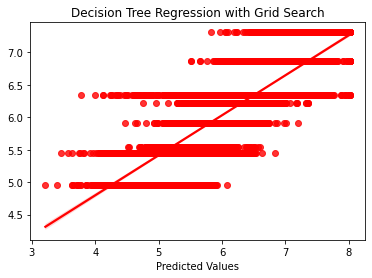

In [25]:
import seaborn as sns
sns.regplot(x=y_test,y=tuned_pred,color ='red');
plt.title('Decision Tree Regression with Grid Search')
plt.xlabel('Actual Values')
plt.xlabel('Predicted Values')